# Application of unsupervised learning

## 1. Presentation of the dataset

We chose the dataset "Beer Reviews from Beer Advocate (1.5 Million)" from Kaggle ([https://www.kaggle.com/datasets/thedevastator/1-5-million-beer-reviews-from-beer-advocate](https://www.kaggle.com/datasets/thedevastator/1-5-million-beer-reviews-from-beer-advocate)). This dataset consist of 1.5 millions beer reviews from *Beer Advocate* ([https://www.beeradvocate.com/](https://www.beeradvocate.com/)).
The dataset contains the following features:
- **brewery_id** : ID of the brewery that made the beer
- **brewery_name** : name of the brewery that made the beer
- **review_time** : date and time of the review
- **review_overall** : reviewer's overall rating of the beer on a scale from 0 to 5
- **review_aroma** : reviewer's rating of the beer's aroma on a scale from 0 to 5
- **review_appearance** : reviewer's rating of the beer's appearance on a scale from 0 to 5
- **review_profilename** : reviewer's username
- **beer_style** : style of the beer (ex: IPA, American Pale Ale, etc.)
- **review_palate** : reviewer's rating of the beer's palate on a scale from 0 to 5 (palate = the feel of the beer in the mouth)
- **review_taste** : reviewer's rating of the beer's taste on a scale from 0 to 5
- **beer_name** : name of the beer
- **beer_abv** : alcohol by volume of the beer

## 2. Problem definition

The problem we are trying to solve is to group beers based on the reviews and the alcohol by volume to make a beer recommender system. By clustering the beers, we aim to identify the beers that are similar to each other and recommend them to the users.

We will use the following features to cluster the beers:
- **beer_style**
- **beer_abv**
- **review_overall**
- **review_aroma**
- **review_appearance**
- **review_palate**
- **review_taste**
- **review_profilename**

The problem we are solving would be interesting or have a value for an industry because it would allow to recommend beers to the users based on their preferences. This could be used by a beer company or bars to recommend beers to the users based on their preferences and the beers they have already tried.



## 3. Data loading and analysis

### Loading the dataset

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
!pip install opendatasets


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


We are downloading the dataset from Kaggle using the `opendatasets` library as the dataset is too big to be uploaded on GitHub. 

In [146]:
import opendatasets as od

od.download(
    "https://www.kaggle.com/datasets/thedevastator/1-5-million-beer-reviews-from-beer-advocate")

Skipping, found downloaded files in "./1-5-million-beer-reviews-from-beer-advocate" (use force=True to force download)


In [147]:
data = pd.read_csv('1-5-million-beer-reviews-from-beer-advocate/beer_reviews.csv')
# data = pd.read_csv('/content/1-5-million-beer-reviews-from-beer-advocate/beer_reviews.csv')
data.head()

index  brewery_id             brewery_name  review_time  review_overall  \
0      0       10325          Vecchio Birraio   1234817823             1.5   
1      1       10325          Vecchio Birraio   1235915097             3.0   
2      2       10325          Vecchio Birraio   1235916604             3.0   
3      3       10325          Vecchio Birraio   1234725145             3.0   
4      4        1075  Caldera Brewing Company   1293735206             4.0   

   review_aroma  review_appearance review_profilename  \
0           2.0                2.5            stcules   
1           2.5                3.0            stcules   
2           2.5                3.0            stcules   
3           3.0                3.5            stcules   
4           4.5                4.0     johnmichaelsen   

                       beer_style  review_palate  review_taste  \
0                      Hefeweizen            1.5           1.5   
1              English Strong Ale            3.0           3.0   
2          Foreign / Export Stout            3.0           3.0   
3                 German Pilsener            2.5           3.0   
4  American Double / Imperial IPA            4.0           4.5   

                beer_name  beer_abv  beer_beerid  
0            Sausa Weizen       5.0        47986  
1                Red Moon       6.2        48213  
2  Black Horse Black Beer       6.5        48215  
3              Sausa Pils       5.0        47969  
4           Cauldron DIPA       7.7        64883

### Taking a sample of the data

We took a sample of the dataset to reduce the computation time of the analysis and the clustering. We took a sample of 10% of the dataset.

In [148]:
data = data.sample(frac=0.01, random_state=0)
data.shape

(15866, 14)

### Analysis of the dataset

#### Shape of the dataset

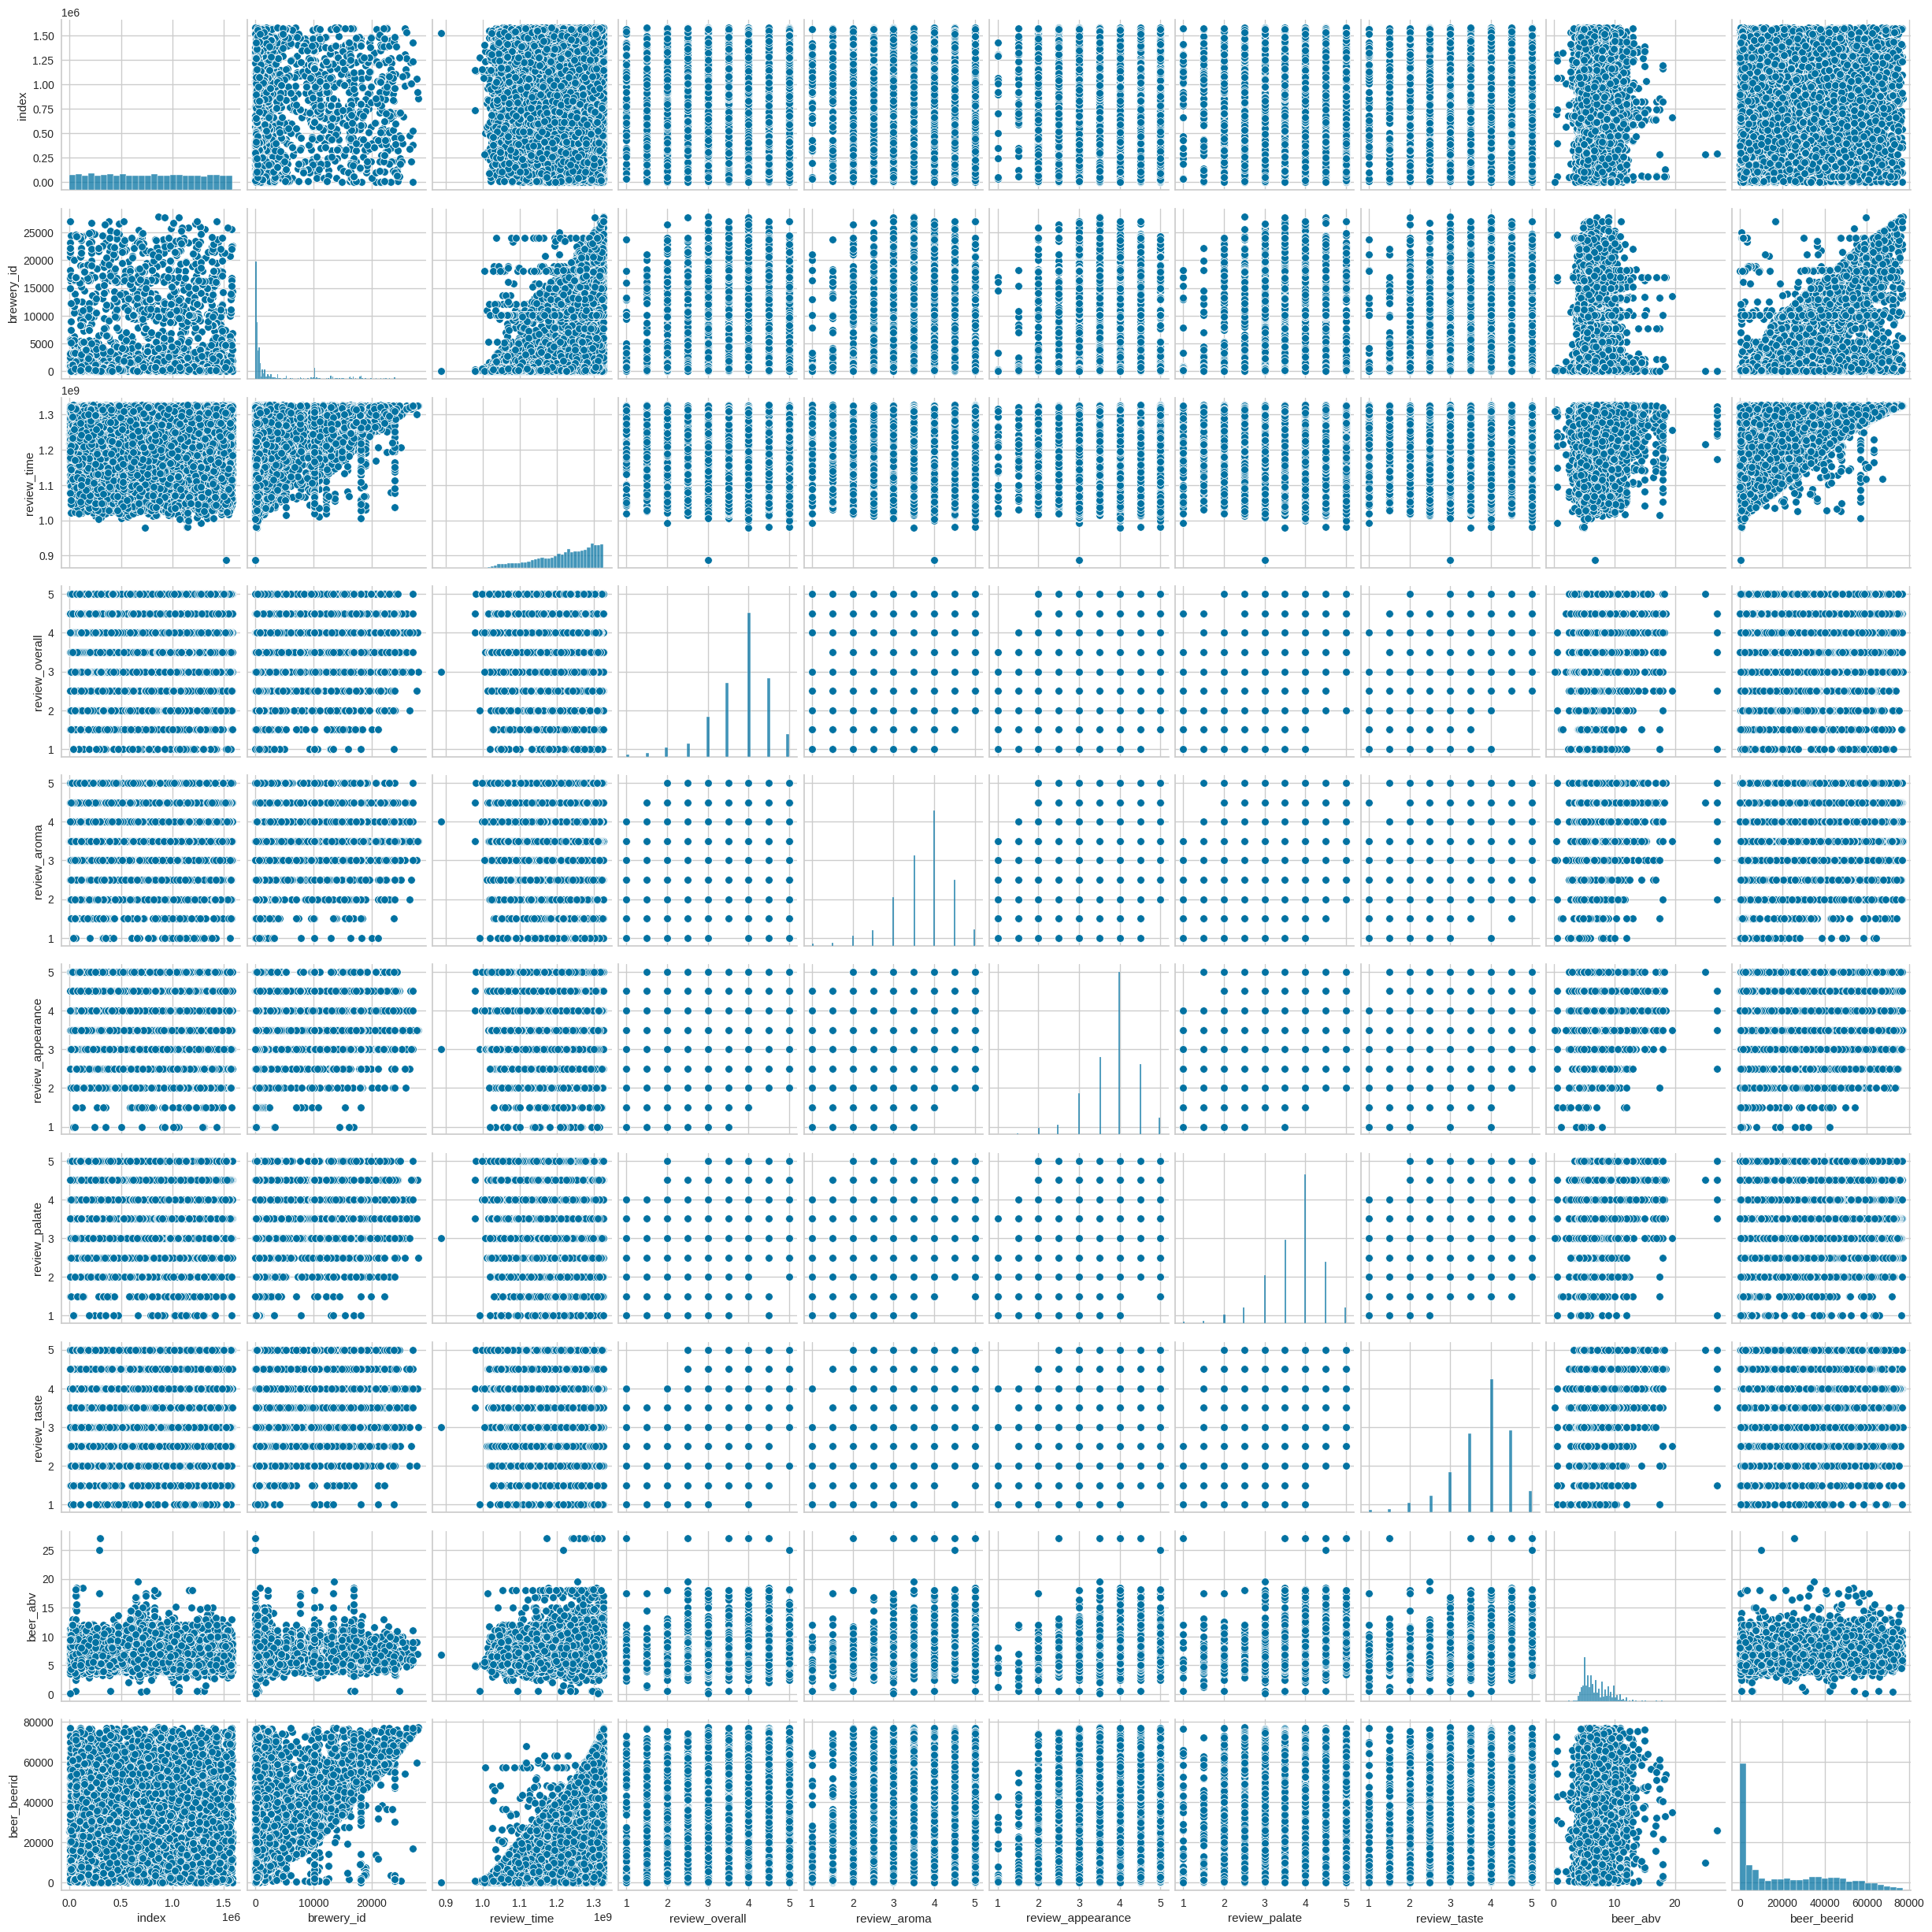

In [149]:
sns.pairplot(data)

#### Descriptive statistics

We will start by analyzing the descriptive statistics of the dataset. We will look at the mean, standard deviation, minimum, maximum, and quartiles of the review and abv features in the dataset.

In [150]:
only_reviews_and_abv = ['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv']
print(data[only_reviews_and_abv].describe())

       review_overall  review_aroma  review_appearance  review_palate  \
count    15866.000000  15866.000000        15866.00000   15866.000000   
mean         3.824467      3.739821            3.84533       3.753624   
std          0.711910      0.694219            0.61543       0.675463   
min          1.000000      1.000000            1.00000       1.000000   
25%          3.500000      3.500000            3.50000       3.500000   
50%          4.000000      4.000000            4.00000       4.000000   
75%          4.500000      4.000000            4.00000       4.000000   
max          5.000000      5.000000            5.00000       5.000000   

       review_taste      beer_abv  
count  15866.000000  15200.000000  
mean       3.804582      7.067056  
std        0.722684      2.330657  
min        1.000000      0.100000  
25%        3.500000      5.300000  
50%        4.000000      6.500000  
75%        4.500000      8.500000  
max        5.000000     27.000000  


We analyzed the descriptive statistics of the numerical features in the dataset. We can see that the mean overall rating is **3.8**, the mean aroma rating is **3.7**, the mean appearance rating is **3.8**, the mean palate rating is **3.7**, the mean taste rating is **3.8**, and the mean alcohol by volume is **7.0**. The highest alcohol by volume is **57.7%** and the lowest alcohol by volume is **0.0%**.


#### Number of missing values

In [151]:
data.isnull().sum()

index                   0
brewery_id              0
brewery_name            0
review_time             0
review_overall          0
review_aroma            0
review_appearance       0
review_profilename      2
beer_style              0
review_palate           0
review_taste            0
beer_name               0
beer_abv              666
beer_beerid             0
dtype: int64

The dataset contains missing values in the **review_profilename**, **beer_abv** and **brewery_name** columns. We will drop the rows with missing values in the **review_profilename**, **beer_abv** and **brewery_name** columns later in the preprocessing of the date.

#### Number of unique values

In [152]:
data.nunique()

index                 15866
brewery_id             1757
brewery_name           1744
review_time           15865
review_overall            9
review_aroma              9
review_appearance         9
review_profilename     5244
beer_style              104
review_palate             9
review_taste              9
beer_name              6507
beer_abv                251
beer_beerid            6714
dtype: int64

The dataset contains **1,543** unique breweries, **104** unique beer styles, and **57,731** unique beers. The dataset contains **33,996** unique reviewers.

#### Distribution of the features

##### Number of beers per style

In [153]:
nb_beers_by_style = data.groupby('beer_style')['beer_name'].nunique().sort_values(ascending=False)
print(nb_beers_by_style.head(10))

beer_style
American IPA                        404
American Pale Ale (APA)             285
American Double / Imperial IPA      252
American Amber / Red Ale            218
American Porter                     194
American Double / Imperial Stout    162
Fruit / Vegetable Beer              160
Saison / Farmhouse Ale              150
Russian Imperial Stout              149
Belgian Strong Pale Ale             141
Name: beer_name, dtype: int64


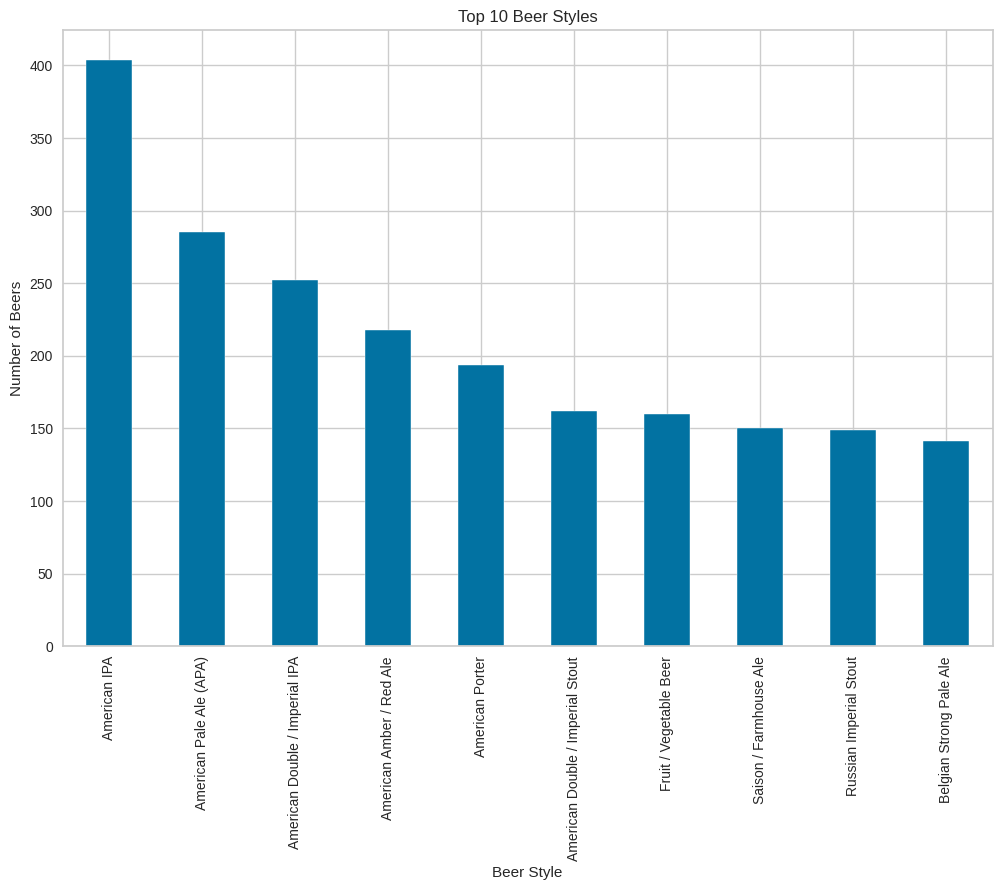

In [154]:
# Plot the top 10 beer styles
plt.figure(figsize=(12, 8))
nb_beers_by_style.head(10).plot(kind='bar')
plt.title('Top 10 Beer Styles')
plt.xlabel('Beer Style')
plt.ylabel('Number of Beers')

plt.show()

##### Number of beers per brewery

In [155]:
nb_beers_by_brewery= data.groupby('brewery_name')['beer_name'].nunique().sort_values(ascending=False)
print(nb_beers_by_brewery.head(10))

brewery_name
Boston Beer Company (Samuel Adams)    72
Stone Brewing Co.                     55
Rogue Ales                            50
Anheuser-Busch                        49
Mikkeller ApS                         46
Bell's Brewery, Inc.                  45
The Bruery                            41
Dogfish Head Brewery                  41
New Glarus Brewing Company            40
New Belgium Brewing                   40
Name: beer_name, dtype: int64


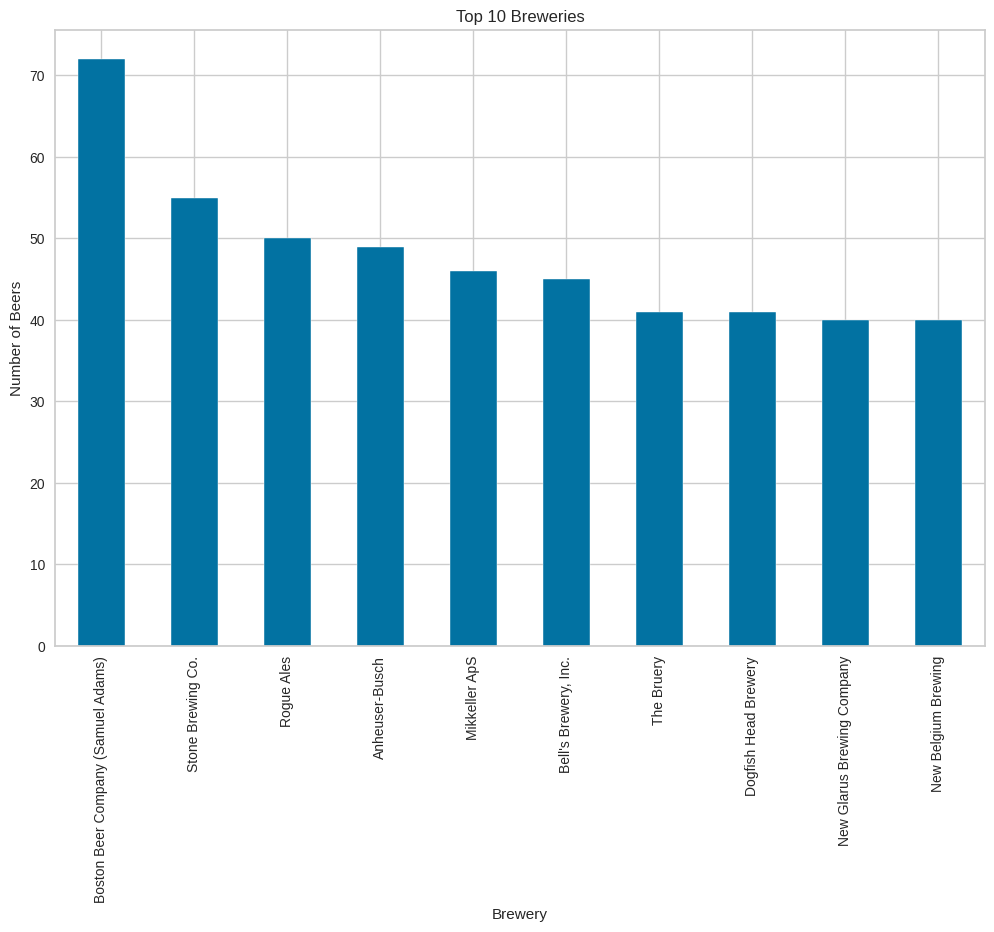

In [156]:
# Plot the top 10 breweries
plt.figure(figsize=(12, 8))
nb_beers_by_brewery.head(10).plot(kind='bar')
plt.title('Top 10 Breweries')
plt.xlabel('Brewery')
plt.ylabel('Number of Beers')
plt.show()

##### Distribution of ratings

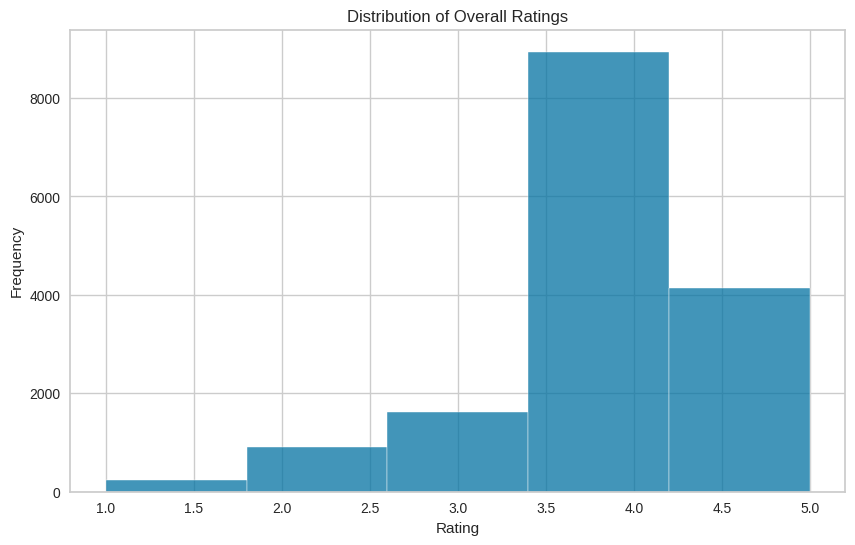

In [157]:
plt.figure(figsize=(10, 6))
sns.histplot(data['review_overall'], bins=5)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

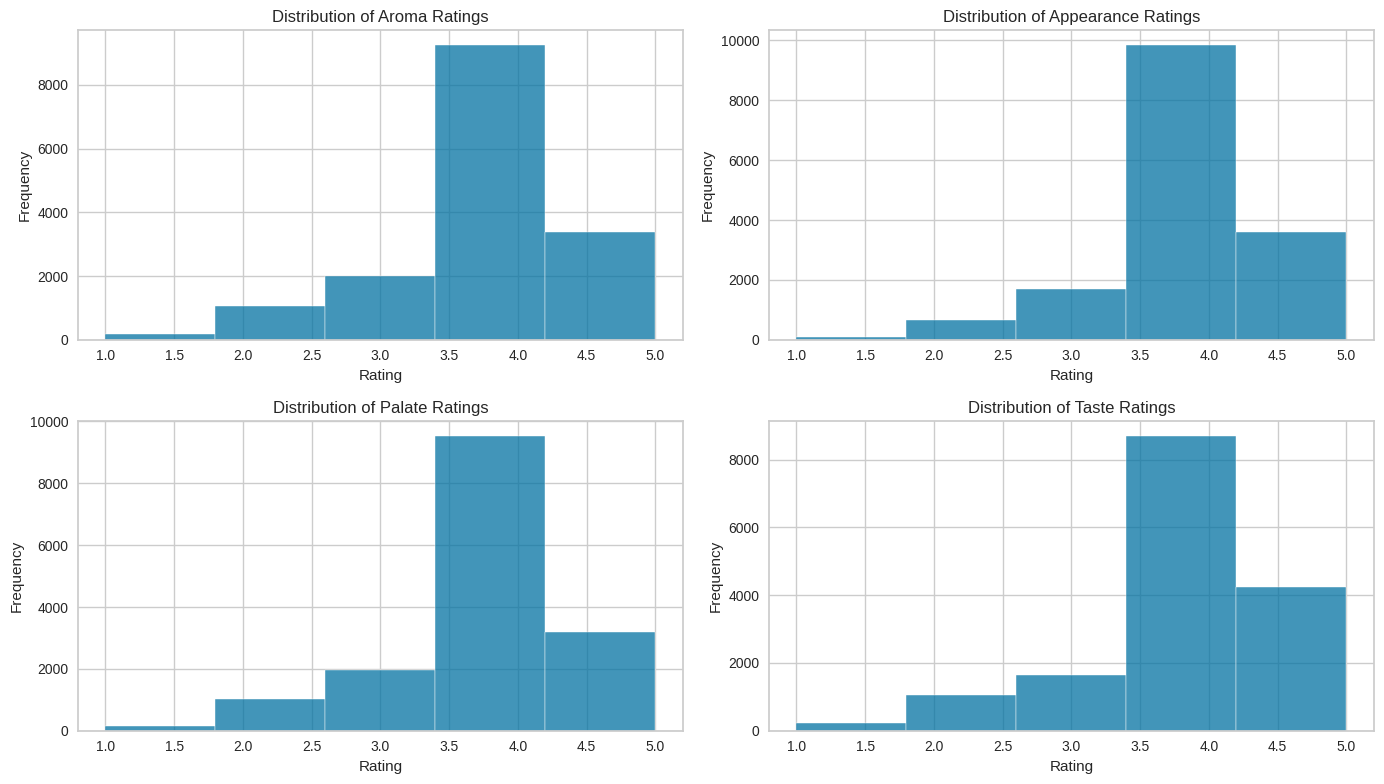

In [158]:
numerical_columns = ['review_aroma', 'review_appearance', 'review_palate', 'review_taste']
plt.figure(figsize=(14, 8))
for i, column in enumerate(numerical_columns):
    name = column.split('_')[-1].capitalize()
    plt.subplot(2, 2, i+1)
    sns.histplot(data[column], bins=5)
    plt.title(f'Distribution of {name} Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Outliers detection

##### Box plot of overall ratings

We used box plots to detect outliers in the overall ratings.

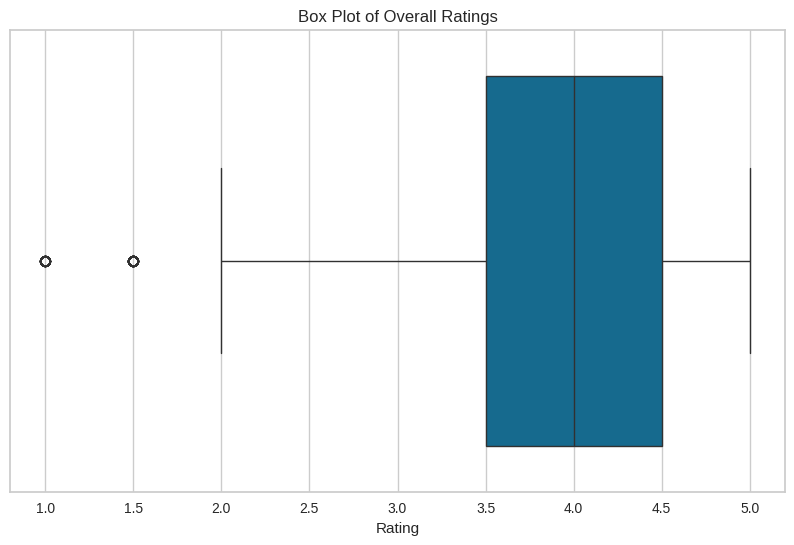

In [159]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['review_overall'])
plt.title('Box Plot of Overall Ratings')
plt.xlabel('Rating')
plt.show()

We can see that the overall ratings are distributed between 2 and 5 with a median of 4. We can see  outliers in the overall ratings below 2.

##### Box plot of other ratings

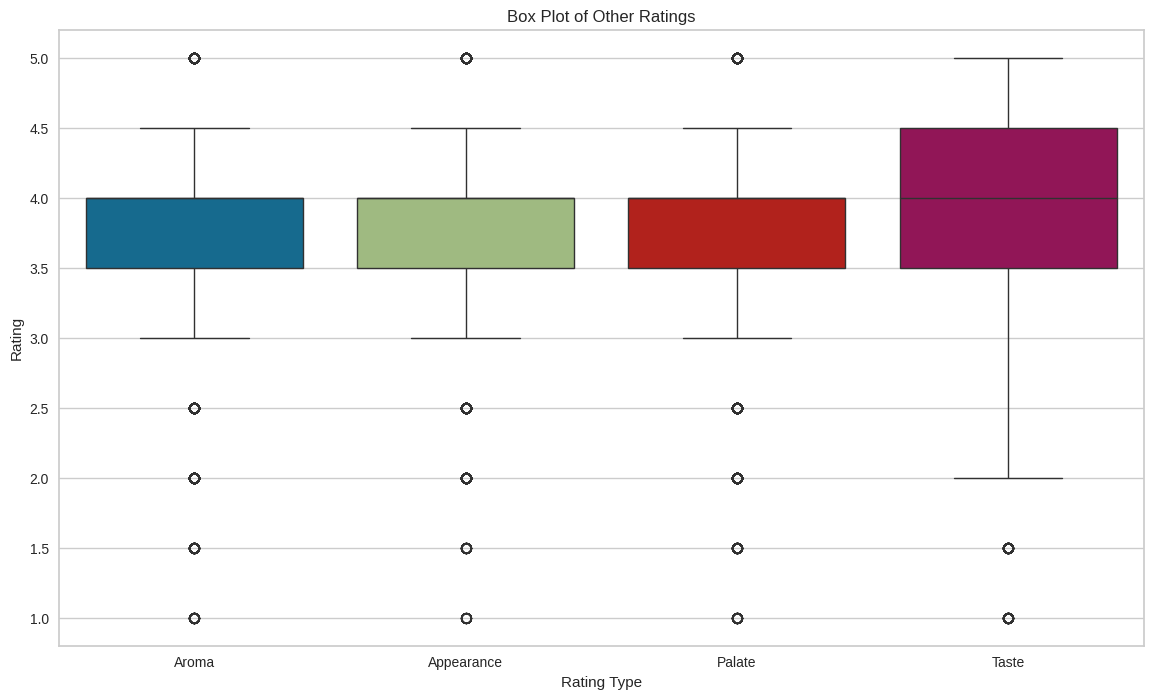

In [160]:
numerical_columns_name = ['Aroma', 'Appearance', 'Palate', 'Taste']
plt.figure(figsize=(14, 8))
sns.boxplot(data=data[numerical_columns])
plt.title('Box Plot of Other Ratings')
plt.xlabel('Rating Type')
plt.ylabel('Rating')
plt.xticks(ticks=[0, 1, 2, 3], labels=numerical_columns_name)
plt.show()

We can see that the aroma, appearance and palate ratings are distributed between  and 4.5. We can see outliers in the aroma, appearance and palate ratings below  3 and upper 4.5. The taste ratings are distributed between 2 and 5 with a median of 4. We can see outliers in the taste ratings below 2.

#### Correlation matrix

In [161]:
correlation_matrix = data[only_reviews_and_abv].corr()
print(correlation_matrix)

                   review_overall  review_aroma  review_appearance  \
review_overall           1.000000      0.611562           0.490292   
review_aroma             0.611562      1.000000           0.550111   
review_appearance        0.490292      0.550111           1.000000   
review_palate            0.696828      0.608511           0.559112   
review_taste             0.782223      0.712365           0.536687   
beer_abv                 0.148245      0.328417           0.273133   

                   review_palate  review_taste  beer_abv  
review_overall          0.696828      0.782223  0.148245  
review_aroma            0.608511      0.712365  0.328417  
review_appearance       0.559112      0.536687  0.273133  
review_palate           1.000000      0.722726  0.295606  
review_taste            0.722726      1.000000  0.299354  
beer_abv                0.295606      0.299354  1.000000  


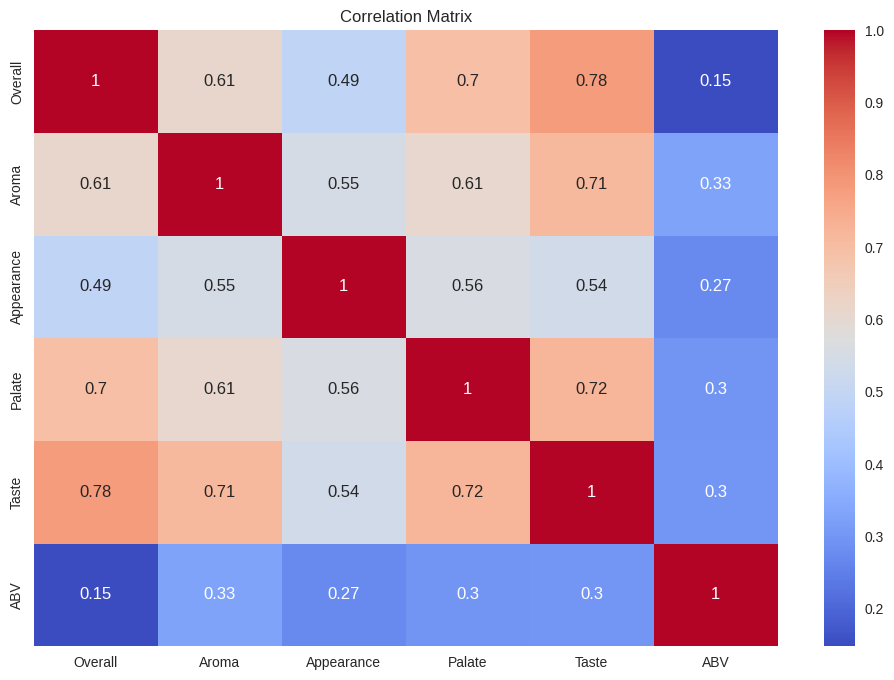

In [162]:
only_reviews_and_abv_name = ['Overall', 'Aroma', 'Appearance', 'Palate', 'Taste', 'ABV']
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=only_reviews_and_abv_name, yticklabels=only_reviews_and_abv_name)
plt.title('Correlation Matrix')
plt.show()


With this correlation matrix, we can see that there is a high correlation between the overall rating and the taste rating (0.79), the palate rating and the taste rating (0.73), the aroma rating and the taste rating (0.72) and the overall rating and the palate rating (0.7). We can see that there is a low correlation between the alcohol by volume and the other ratings.

#### Reviewers data analysis

##### Number of reviews per reviewer

In [163]:
nb_reviews_per_reviewer = data.groupby('review_profilename')['beer_name'].count().sort_values(ascending=False)
print(nb_reviews_per_reviewer.head(10))

review_profilename
northyorksammy    74
BuckeyeNation     50
Thorpe429         45
mikesgroove       44
NeroFiddled       43
oberon            40
feloniousmonk     38
akorsak           38
Phyl21ca          37
womencantsail     37
Name: beer_name, dtype: int64


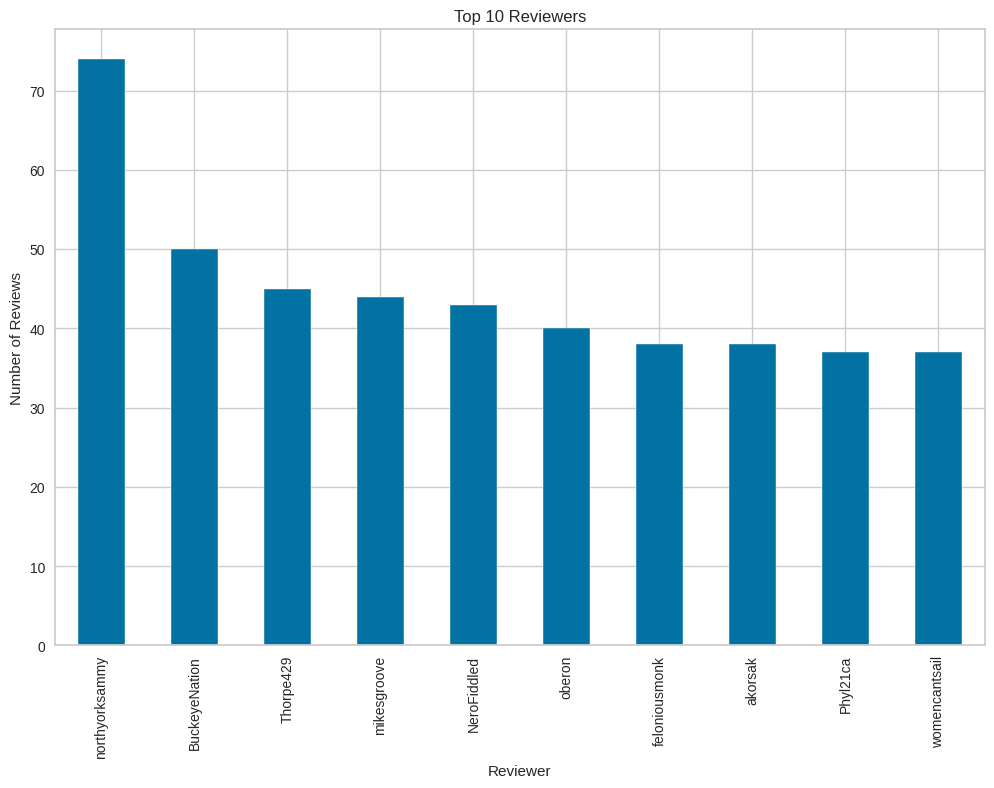

In [164]:
plt.figure(figsize=(12, 8))
nb_reviews_per_reviewer.head(10).plot(kind='bar')
plt.title('Top 10 Reviewers')
plt.xlabel('Reviewer')
plt.ylabel('Number of Reviews')
plt.show()

##### Distribution of the number of reviews per reviewer

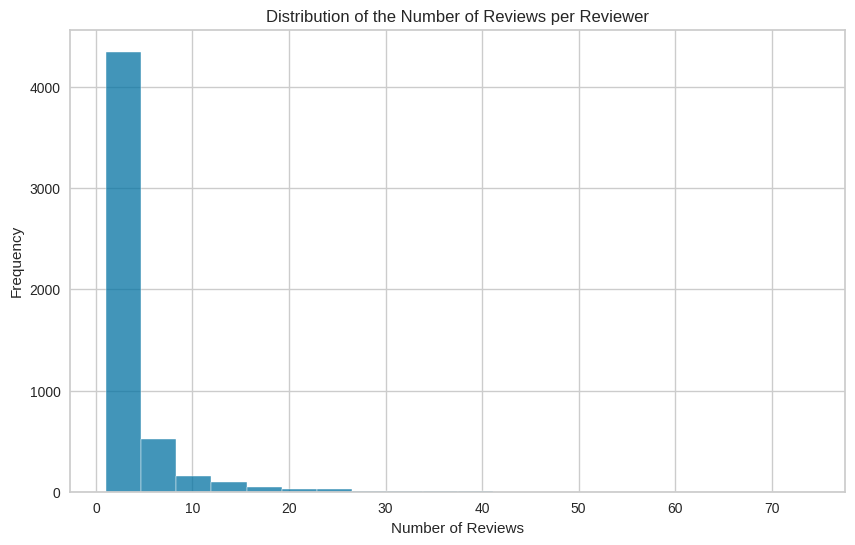

In [165]:
plt.figure(figsize=(10, 6))
sns.histplot(nb_reviews_per_reviewer, bins=20)
plt.title('Distribution of the Number of Reviews per Reviewer')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

##### Number of reviewers per beer

In [166]:
nb_reviewers_per_beer = data.groupby('beer_name')['review_profilename'].nunique().sort_values(ascending=False)
print(nb_reviewers_per_beer.head(10))

beer_name
90 Minute IPA                          39
Stone Ruination IPA                    31
Sierra Nevada Pale Ale                 31
Arrogant Bastard Ale                   29
Bell's Hopslam Ale                     29
Old Rasputin Russian Imperial Stout    28
Duvel                                  27
Sierra Nevada Celebration Ale          26
Samuel Smith's Oatmeal Stout           26
Bourbon County Brand Stout             25
Name: review_profilename, dtype: int64


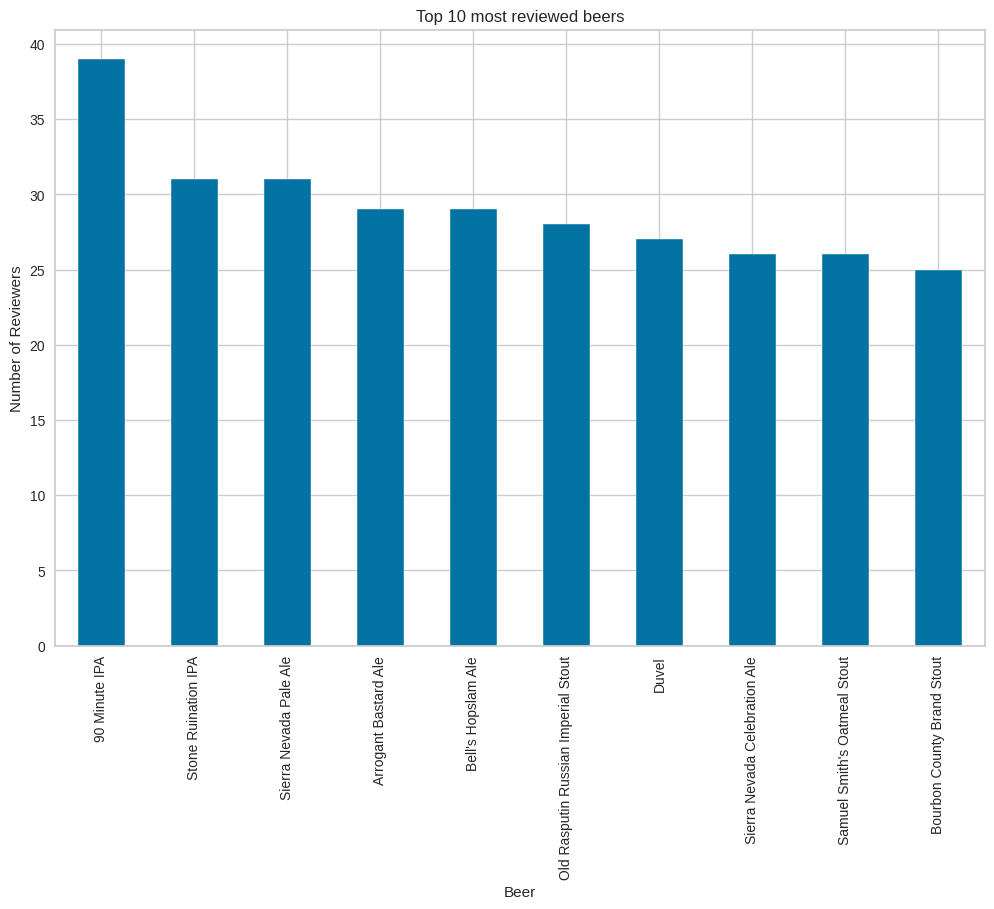

In [167]:
plt.figure(figsize=(12, 8))
nb_reviewers_per_beer.head(10).plot(kind='bar')
plt.title('Top 10 most reviewed beers')
plt.xlabel('Beer')
plt.ylabel('Number of Reviewers')
plt.show()

##### Distribution of the number of reviewers per beer

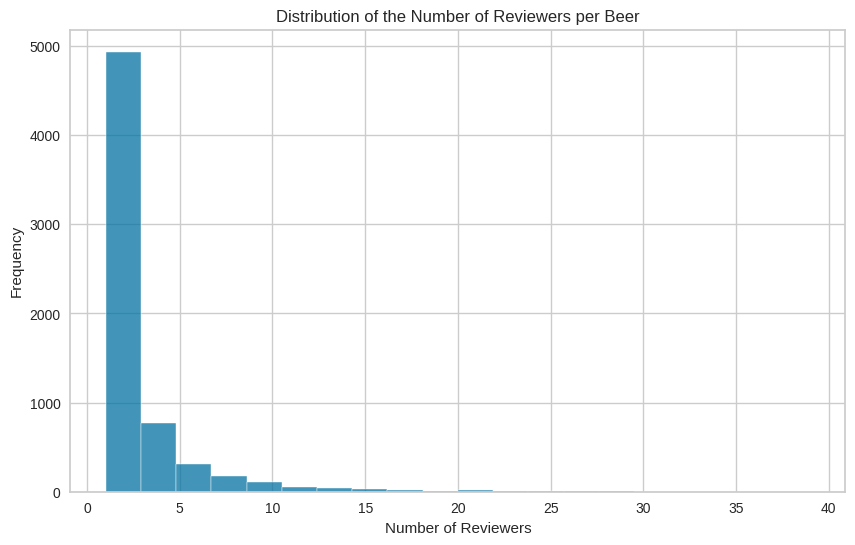

In [168]:
plt.figure(figsize=(10, 6))
sns.histplot(nb_reviewers_per_beer, bins=20)
plt.title('Distribution of the Number of Reviewers per Beer')
plt.xlabel('Number of Reviewers')
plt.ylabel('Frequency')
plt.show()

## 4. Data preprocessing

### Dropping missing values

In [169]:
preprocessed_data = data.dropna()
print("Number of rows before dropping missing values:", data.shape[0])
print("Number of rows after dropping missing values:", preprocessed_data.shape[0])
print("Number of dropped rows:", data.shape[0] - preprocessed_data.shape[0])
preprocessed_data.isnull().sum()

Number of rows before dropping missing values: 15866
Number of rows after dropping missing values: 15198
Number of dropped rows: 668


index                 0
brewery_id            0
brewery_name          0
review_time           0
review_overall        0
review_aroma          0
review_appearance     0
review_profilename    0
beer_style            0
review_palate         0
review_taste          0
beer_name             0
beer_abv              0
beer_beerid           0
dtype: int64

### Dropping duplicates

In [170]:
preprocessed_data = preprocessed_data.drop_duplicates()
print("Number of rows before dropping duplicates:", data.shape[0])
print("Number of rows after dropping duplicates:", preprocessed_data.shape[0])
print("Number of dropped rows:", data.shape[0] - preprocessed_data.shape[0])    

Number of rows before dropping duplicates: 15866
Number of rows after dropping duplicates: 15198
Number of dropped rows: 668


### Selecting the relevant features columns for clustering

In [171]:
features = ['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv', 'review_profilename', 'beer_style']
X = preprocessed_data[features]
X.head()

review_overall  review_aroma  review_appearance  review_palate  \
1063967             4.0           4.5                3.0            3.5   
301571              3.5           3.5                4.0            4.0   
1389021             4.0           4.5                4.0            4.5   
604747              3.0           3.5                3.0            3.0   
508674              5.0           4.5                4.0            4.5   

         review_taste  beer_abv review_profilename  \
1063967           4.0       5.6         RedDiamond   
301571            4.0       4.9        shabbtastic   
1389021           4.0       8.9          thagr81us   
604747            3.0       5.1          philbe311   
508674            4.5       6.0        brandoneast   

                             beer_style  
1063967                 American Porter  
301571                      Schwarzbier  
1389021  American Double / Imperial IPA  
604747                        Cream Ale  
508674                   American Stout

### Changing the data type of the string column

In [172]:
from sklearn.preprocessing import LabelEncoder

In [173]:
label_encoder = LabelEncoder()
X.loc[:, 'review_profilename'] = label_encoder.fit_transform(X['review_profilename'])
X.loc[:, 'beer_style'] = label_encoder.fit_transform(X['beer_style'])
X.head()

review_overall  review_aroma  review_appearance  review_palate  \
1063967             4.0           4.5                3.0            3.5   
301571              3.5           3.5                4.0            4.0   
1389021             4.0           4.5                4.0            4.5   
604747              3.0           3.5                3.0            3.0   
508674              5.0           4.5                4.0            4.5   

         review_taste  beer_abv review_profilename beer_style  
1063967           4.0       5.6               1655         17  
301571            4.0       4.9               4600         93  
1389021           4.0       8.9               4853          9  
604747            3.0       5.1               4305         35  
508674            4.5       6.0               2606         18

### Scaling the features

We will scale the features to have a mean of 0 and a standard deviation of 1. It is important to scale the features before clustering because the features have different scales and clustering algorithms are sensitive to the scales of the features.

In [174]:
from sklearn.preprocessing import StandardScaler

In [175]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

review_overall  review_aroma  review_appearance  review_palate  \
0        0.238221      1.082186          -1.386045      -0.387821   
1       -0.464512     -0.357760           0.238973       0.353203   
2        0.238221      1.082186           0.238973       1.094226   
3       -1.167246     -0.357760          -1.386045      -1.128845   
4        1.643688      1.082186           0.238973       1.094226   

   review_taste  beer_abv  review_profilename  beer_style  
0      0.258094 -0.629598           -0.596998   -0.763732  
1      0.258094 -0.929951            1.381332    1.547091  
2      0.258094  0.786347            1.551287   -1.006977  
3     -1.123800 -0.844136            1.183163   -0.216432  
4      0.949040 -0.457969            0.041845   -0.733327

We scaled only the numerical features and not the categorical features because the categorical features are already encoded and have a range between 0 and the number of unique values.

### Principal Component Analysis (PCA)

We performed a principal component analysis (PCA) to reduce the dimensionality of the dataset. PCA is useful before performing k-means because it helps with the computation time and th inertia of the k-means algorithm. 

In [176]:
from sklearn.decomposition import PCA

In [177]:
pca = PCA(n_components=X_scaled.shape[1])
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)
cumulative_explained_variance = np.cumsum(explained_variance)
print("Cumulative explained variance:", cumulative_explained_variance)

Explained variance ratio: [0.45728408 0.13091502 0.12426383 0.10833718 0.06950739 0.04991177
 0.03583188 0.02394884]
Cumulative explained variance: [0.45728408 0.5881991  0.71246293 0.82080012 0.89030751 0.94021928
 0.97605116 1.        ]


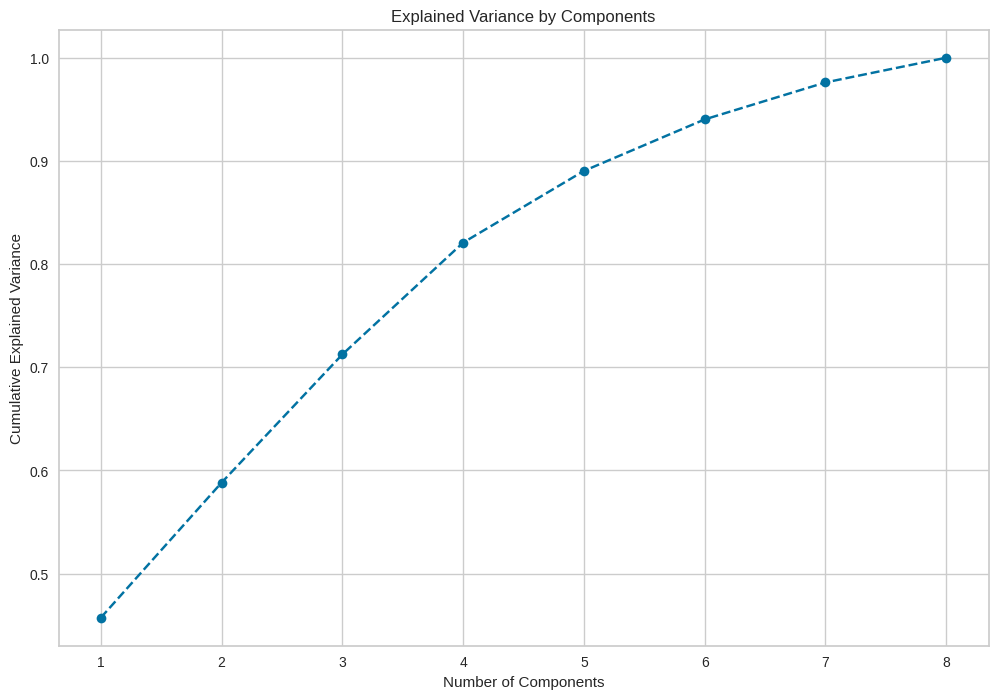

In [178]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, X_scaled.shape[1]+1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [179]:
desired_variance = 0.95
n_components = np.argmax(cumulative_explained_variance >= desired_variance) + 1

print(f"Number of components to explain {desired_variance*100}% of the variance:", n_components)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

Number of components to explain 95.0% of the variance: 7


## 5. Clustering

### K-means clustering with silhouette score

We will use the k-means algorithm to cluster the beers. We will use the silhouette score to evaluate the quality of the clusters. The silhouette score is a metric that measures how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

#### With all the preprocessing steps (scaling, PCA)

#### Display data graphically before clustering in 3D

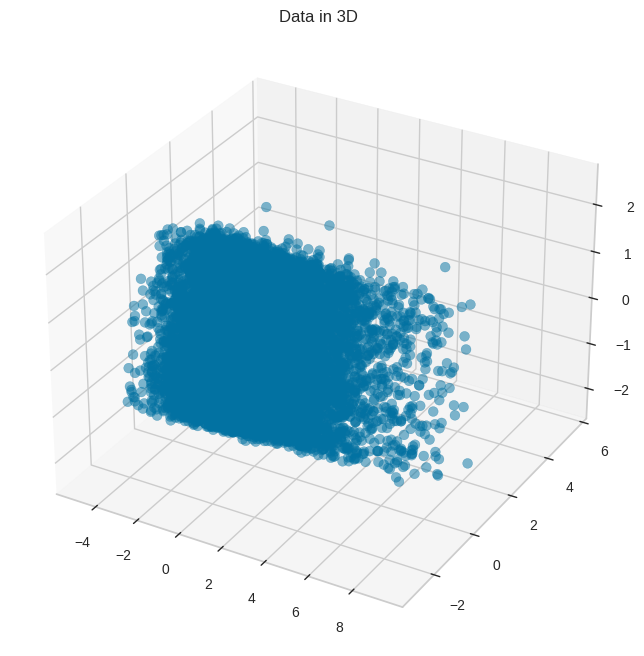

In [180]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], s=50, alpha=0.5)
plt.title('Data in 3D')
plt.show()

In [181]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [182]:
k_values = range(2, 11)
silhouette_scores = []
for k in k_values:
    print(f"Training model with k={k}")
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10, max_iter=100)
    kmeans.fit(X_pca)
    print(f"Model trained with k={k}")
    silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
    print(f"Silhouette score for k={k}: {silhouette_avg}")
    silhouette_scores.append(silhouette_avg)
    

print(f"Best silhouette score: {max(silhouette_scores)} for k={silhouette_scores.index(max(silhouette_scores))+2}")

Training model with k=2
Model trained with k=2
Silhouette score for k=2: 0.2792112619112309
Training model with k=3
Model trained with k=3
Silhouette score for k=3: 0.1626833902868145
Training model with k=4
Model trained with k=4
Silhouette score for k=4: 0.1679201241198078
Training model with k=5
Model trained with k=5
Silhouette score for k=5: 0.15764789727407733
Training model with k=6
Model trained with k=6
Silhouette score for k=6: 0.14719017960009384
Training model with k=7
Model trained with k=7
Silhouette score for k=7: 0.1499366618190457
Training model with k=8
Model trained with k=8
Silhouette score for k=8: 0.1434863511379455
Training model with k=9
Model trained with k=9
Silhouette score for k=9: 0.1438068317404474
Training model with k=10
Model trained with k=10
Silhouette score for k=10: 0.140988718685128
Best silhouette score: 0.2792112619112309 for k=2


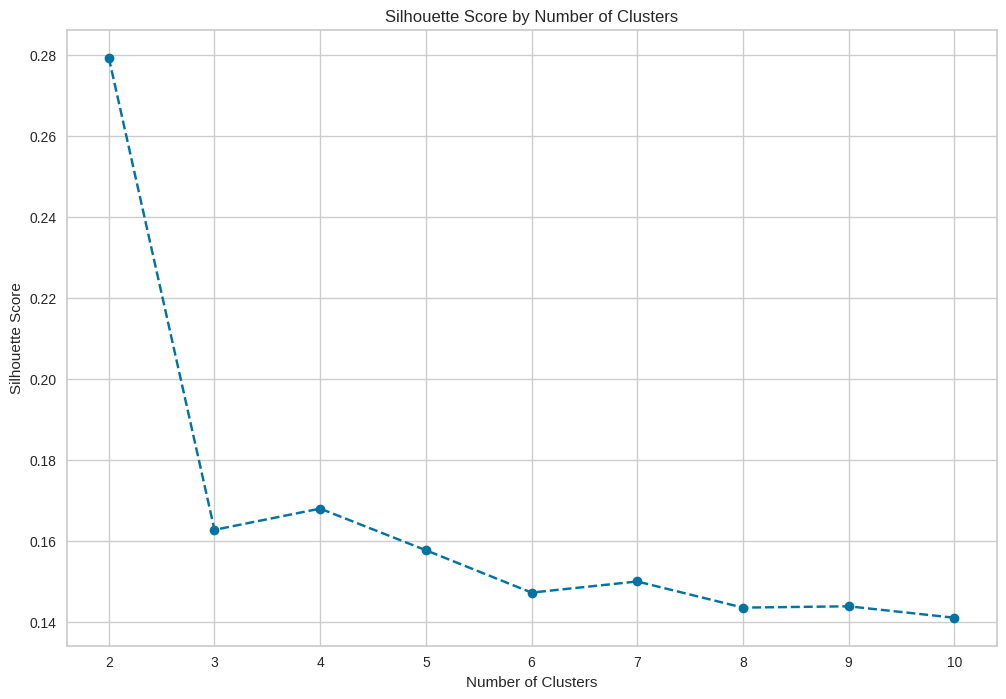

In [183]:
plt.figure(figsize=(12, 8))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score by Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [184]:
best_k = silhouette_scores.index(max(silhouette_scores)) + 2
kmeans = KMeans(n_clusters=best_k, random_state=0, n_init=10, max_iter=100)
kmeans.fit(X_pca)
clusters = kmeans.predict(X_pca)

## Display of best clusters graphically


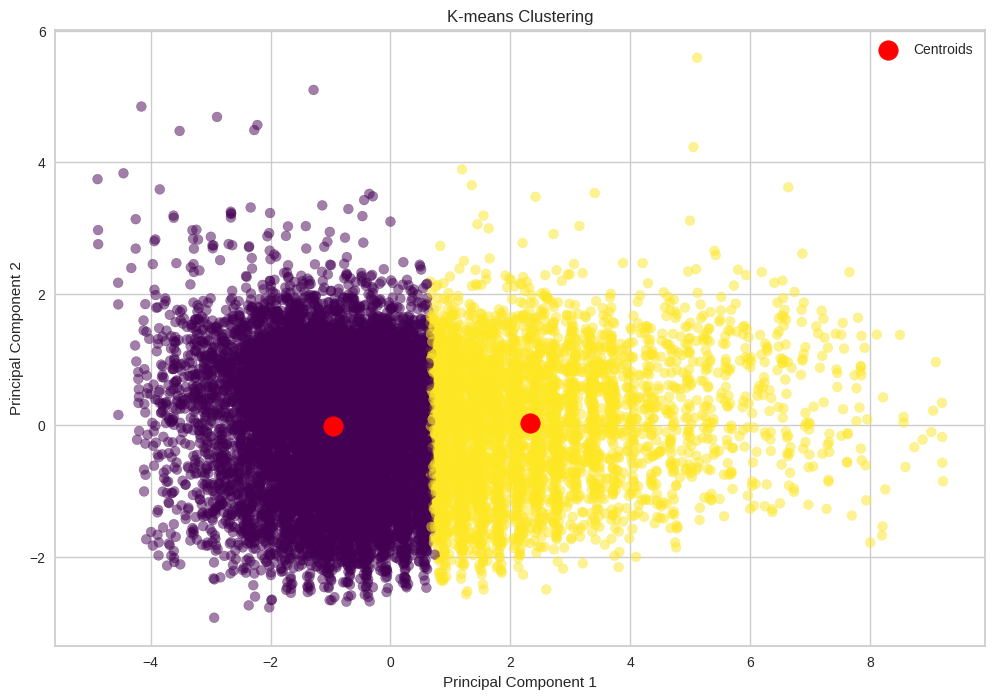

In [185]:
plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [186]:
# display the cluster in 3D with the first 3 principal components

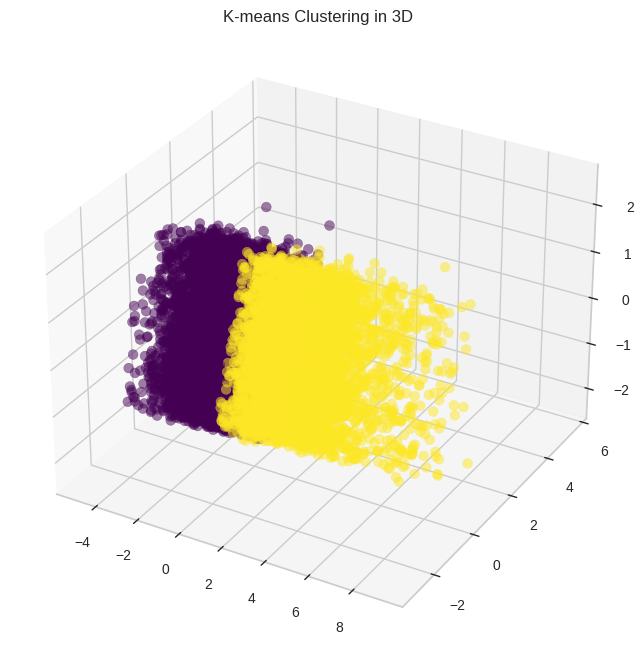

In [187]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='viridis', s=50, alpha=0.5)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c='red', label='Centroids')
plt.title('K-means Clustering in 3D')
plt.show()